In [69]:
# import packages

# array-processing 
import numpy as np
# dataframe processing
import pandas as pd

# math/science computing
from scipy.stats import zscore
import scipy.stats as stats

# count stuff
from collections import Counter

# enable classification modeling
# SKLearn requires us to specify an outcome (y/dependant variable) and 
# inputs (x/independent variables)
import sklearn
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
# enable ability to setup test/training model conditions
from sklearn.model_selection import train_test_split
# evaluate accuracy of classification model
from sklearn.metrics import confusion_matrix
# evaluate model score and overfitting using cross validation methods 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

# PCA packages
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# enable inline plotting
%matplotlib inline
# import plotting packages
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns

# Shutup Warnings!
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import text file and assigning separator based on raw file
df_yelp = pd.read_csv('yelp_labelled.txt', sep='\t', header=None )
df_yelp.columns = ["customer_comments", "customer_rank"] # assigning column names
df_yelp.head()

,customer_comments,customer_rank
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df_v5 = df_yelp.copy()

In [5]:
# general clean up script that was used in previous exercise. Formats strings to be similar style
spec_chars = ['__', ',', '(', ')', '/', '.', '"', '-','_', '  ' ]

# fewer required characters with for loop vs method chaining
for char in spec_chars:
    df_v5['customer_comments'] = df_v5['customer_comments'].str.strip().str.replace(char, ' ')

In [6]:
# this must be run AFTER the all caps cell. This is done to normalize text formats to account for all versions of the same words.
df_v5['customer_comments_lwr_case'] = df_v5['customer_comments'].str.lower()

In [7]:
df_v5.head()

,customer_comments,customer_rank,customer_comments_lwr_case
0,Wow Loved this place,1,wow loved this place
1,Crust is not good,0,crust is not good
2,Not tasty and the texture was just nasty,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


In [8]:
# general clean up script that was used in previous exercise. Normalizes column names and removes special characters
spec_chars = ['__', ',', '!', '(', ')', '/', '.', '"', '-', ' ', '  ']

# fewer required characters with for loop vs method chaining
for char in spec_chars:
    df_v5.customer_comments_lwr_case = df_v5.customer_comments_lwr_case.str.replace(char, ' ')

# needed to do this str.replace method separate from above because it took 2 runs of the code to work and that's not intuitive for users
#df_v5.customer_comments_lwr_case = df_v5.customer_comments_lwr_case.str.strip().str.lower().str.replace(' ', '_')

In [9]:
# replacing "&" with "and"
spec_chars = ['&']

# fewer required characters with for loop vs method chaining
for char in spec_chars:
    df_v5.customer_comments_lwr_case = df_v5.customer_comments_lwr_case.str.replace(char, 'and')

Something that was not considered in earlier versions was the removal of stop words. These will be removed in this version to remove unnecessary words.

In [10]:
# importing stopwords 
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [11]:
# after reviewing the list of stop words and customer comments, these words were considered important to keep in the mode.
# removing these words from the stopword list will keep them inside the dataframe.
stop = [word for word in stop if word != "don't"]
stop = [word for word in stop if word != "not"]
stop = [word for word in stop if word != "won't"]
stop = [word for word in stop if word != "wouldn't"]

In [12]:
# removes stopwords from dataframe, and creates new column with remaining words.
# the result, in this case, is a series of stings per cell. 
# the other option is leave a list of words in each cell but the typical code in this workflow won't work the same.
df_v5['stop_comments'] = df_v5['customer_comments_lwr_case'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [13]:
# apostrophies remain, so this will remove them in order to normalize text further.
spec_chars = ["'"]

# fewer required characters with for loop vs method chaining
for char in spec_chars:
    df_v5.stop_comments = df_v5.stop_comments.str.replace(char, '')

In [14]:
# Counting words in customer_comments
df_v5['word_count'] =  df_v5['stop_comments'].str.split(" ").str.len()

In [15]:
df_v5.sample(10)

,customer_comments,customer_rank,customer_comments_lwr_case,stop_comments,word_count
314,Great food for the price which is very high qu...,1,great food for the price which is very high qu...,great food price high quality house made,7
561,After two I felt disgusting,0,after two i felt disgusting,two felt disgusting,3
851,I probably would not go here again,0,i probably would not go here again,probably would not go,4
367,Would come back again if I had a sushi craving...,1,would come back again if i had a sushi craving...,would come back sushi craving vegas,6
874,Weird vibe from owners,0,weird vibe from owners,weird vibe owners,3
462,Im in AZ all the time and now have my new spot,1,im in az all the time and now have my new spot,im az time new spot,5
751,The wontons were thin not thick and chewy almo...,1,the wontons were thin not thick and chewy almo...,wontons thin not thick chewy almost melt mouth,8
872,All in all an excellent restaurant highlighted...,1,all in all an excellent restaurant highlighted...,excellent restaurant highlighted great service...,9
10,Service was very prompt,1,service was very prompt,service prompt,2
77,The sweet potato fries were very good and seas...,1,the sweet potato fries were very good and seas...,sweet potato fries good seasoned well,6


In [16]:
# looking at frequency of words in the column to see if anything stands out
df_v5.stop_comments.str.split(expand=True).stack().value_counts()

food        126
not         116
place       106
good         95
service      84
           ... 
smells        1
baseball      1
prepared      1
martini       1
shots         1
Length: 1956, dtype: int64

Next, let's see the break down of words used based on customer rank.

In [17]:
# creates new dataframes that contain ONLY positive or negative reviews, respecitvely.
pos_rank = df_v5[df_v5.customer_rank == 1]
neg_rank = df_v5[df_v5.customer_rank == 0]

In [18]:
# looking at frequency of words in the column to see if anything stands out
pos_words = pos_rank.stop_comments.str.split(expand=True).stack().value_counts()

In [19]:
# looking at frequency of words in the column to see if anything stands out
neg_words = neg_rank.stop_comments.str.split(expand=True).stack().value_counts()

In [20]:
pos_words_df = pd.DataFrame(pos_words)
pos_words_df.columns = ['pos_word_count']

In [21]:
neg_words_df = pd.DataFrame(neg_words)
neg_words_df.columns = ['neg_word_count']

In [22]:
# removes words that were only used 1 time.
pos_words_list = pos_words_df[pos_words_df['pos_word_count'] >= 2].index

In [23]:
pos_words_list

Index(['good', 'great', 'food', 'place', 'service', 'friendly', 'delicious',
       'back', 'nice', 'really',
       ...
       'liked', 'crispy', 'simple', 'quickly', 'appetizers', 'marrow', 'tea',
       'cafe', 'stopped', 'delightful'],
      dtype='object', length=396)

In [24]:
# removes words that were only used 1 time.
neg_words_list = neg_words_df[neg_words_df['neg_word_count'] >= 2].index

In [25]:
neg_words_list

Index(['not', 'food', 'place', 'back', 'service', 'like', 'go', 'dont',
       'never', 'good',
       ...
       'towards', 'portions', 'breakfast', 'burgers', 'checked', 'kids',
       'started', 'excuse', 'beat', 'thought'],
      dtype='object', length=458)

I only want to see words that exist in either positive or negative comments.

In [27]:
# removes words from the negative word list if they also exist the positive word list.
new_neg_list = list(set(neg_words_list).difference(set(pos_words_list)))
print(new_neg_list)

['3', 'establishment', 'ok', 'bathroom', 'customers', 'sucked', 'bill', 'bland', 'soup', 'services', 'unless', 'known', 'empty', 'basically', 'arrived', 'received', 'needs', 'crust', 'sitting', 'trying', 'business', 'ripped', 'means', 'talk', 'watched', 'ended', 'third', 'building', 'leave', 'worse', 'waste', 'eating', 'simply', 'hard', 'bisque', 'par', 'grill', '10', 'dog', 'kept', 'mediocre', 'fly', 'lacked', 'immediately', 'possible', 'fail', 'treated', 'use', 'total', 'driest', 'expected', 'sucks', 'happened', 'door', 'probably', 'filet', 'sugary', 'checked', 'old', 'hour', 'minutes', 'money', '4', 'heart', 'location', 'sick', 'please', 'lost', 'list', 'car', 'believe', 'waited', 'seen', 'human', 'slow', 'point', 'given', 'attitudes', 'took', 'seemed', 'fried', '40', 'pulled', 'servers', 'damn', 'unfortunately', 'grossed', 'poor', 'towards', 'texture', 'bad', 'getting', 'favor', 'word', 'stepped', 'totally', 'ate', 'beans', 'either', 'rice', 'crowd', 'hair', 'tables', 'zero', 'seem

In [28]:
# removes words from the positive word list if they also exist the negative word list.
new_pos_list = list(set(pos_words_list).difference(set(neg_words_list)))
print(new_pos_list)

['fact', 'salmon', 'bread', 'dark', 'quick', 'extra', 'tribute', 'beer', 'bowl', 'appetizers', 'assure', 'perfect', '8', 'omg', 'eggplant', 'highly', 'enjoyed', 'hummus', 'chinese', 'added', 'seating', 'beautiful', 'owner', 'oh', 'though', 'party', 'italian', 'selections', 'hands', 'creamy', 'recommended', 'reasonable', 'duck', 'disappoint', 'brick', 'greek', 'white', 'world', 'touch', 'fine', 'sides', 'group', 'steaks', 'delight', 'sweet', 'wrong', 'ago', 'fantastic', 'cheese', 'setting', 'paper', 'healthy', 'pizzas', 'grilled', 'soooo', 'perfectly', 'awesome', 'greeted', 'spot', 'attentive', 'wall', 'delightful', 'dessert', 'different', 'homemade', 'fun', 'told', 'professional', 'stuffed', ':', 'pleased', 'seasoned', 'cream', 'need', 'pleasant', 'ambience', 'loved', 'care', 'phoenix', 'incredible', 'family', 'thin', 'week', 'puree', 'nicest', 'egg', 'music', 'recommendation', 'house', 'brunch', 'excellent', 'belly', 'regular', 'top', 'quickly', 'prices', 'outstanding', 'couple', 'use

In [29]:
# combining both lists into 1 for a single, comprehensive list of key words
word_list = new_pos_list + new_neg_list

In [30]:
# create boolean columns for each word
for key in word_list:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df_v5[str(key)] = df_v5.stop_comments.str.contains(
        '' + str(key) + '',
        case=False
    )

In [31]:
df_v5.head()

,customer_comments,customer_rank,customer_comments_lwr_case,stop_comments,word_count,fact,salmon,bread,dark,quick,...,single,waiting,needed,30,lobster,salt,rarely,big,stale,bother
0,Wow Loved this place,1,wow loved this place,wow loved place,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good,0,crust is not good,crust not good,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty,0,not tasty and the texture was just nasty,not tasty texture nasty,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...,9,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,selection menu great prices,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In order to avoid multi-colinearity, the independent variables with the highest correleation coefficients were removed using the method below.

In [32]:
# decided against graphing the correlation plot here because it was too large to be useful.

# Create correlation matrix
corr_matrix = df_v5.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Drop features 
df_v5.drop(to_drop, axis=1, inplace=True)

In order to determine what words have the most weight against the target, let's remove those with the lower end of correlation coefficients.

In [33]:
correlation_cat = abs(df_v5[df_v5.columns[1:]].corr()['customer_rank'][:]).sort_values(ascending = False)
print(correlation_cat)

customer_rank    1.000000e+00
great            2.555513e-01
delicious        1.568125e-01
bad              1.315066e-01
minutes          1.275153e-01
                     ...     
sides            4.397345e-19
grill            4.397345e-19
crowd            3.106276e-19
salsa            3.106276e-19
subway           3.106276e-19
Name: customer_rank, Length: 451, dtype: float64


In [34]:
# transforming list into dataframe
to_drop_2 = pd.DataFrame(correlation_cat)

# labels correlation column accordingly
to_drop_2.columns = ['corr_customer_rank']

In [35]:
# removes words with low correlation coefficients and transforms to a list.

# 0.03 was determined based on an iterative process of model evaluation.
to_drop_cat = to_drop_2[to_drop_2['corr_customer_rank'] < 0.03].index

In [36]:
# Drop features from working dataframe to narrow scope of features necessary to run the model.
df_v5_2 = df_v5.drop(to_drop_cat, axis=1)

In [37]:
df_v5_2.head()

,customer_comments,customer_rank,customer_comments_lwr_case,stop_comments,word_count,fact,salmon,bread,dark,quick,...,husband,single,waiting,needed,30,salt,rarely,big,stale,bother
0,Wow Loved this place,1,wow loved this place,wow loved place,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Crust is not good,0,crust is not good,crust not good,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty,0,not tasty and the texture was just nasty,not tasty texture nasty,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...,stopped late may bank holiday rick steve recom...,9,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...,selection menu great prices,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Decision Tree

In [38]:
# new list of features that combines all positive and negative words
#feature_list = df_v5_2.select_dtypes(include = 'bool').columns

In [147]:
# new list of features that combines all positive and negative words and word count
feature_list_2 = df_v5_2.iloc[:, 4:].columns

In [148]:
feature_list_2

Index(['word_count', 'fact', 'salmon', 'bread', 'dark', 'quick', 'extra',
       'tribute', 'beer', 'bowl',
       ...
       'husband', 'single', 'waiting', 'needed', '30', 'salt', 'rarely', 'big',
       'stale', 'bother'],
      dtype='object', length=351)

In [149]:
# define training data and target variables

X = df_v5_2[feature_list_2] # independent/inputs
y = df_v5_2['customer_rank'] # dependenty/outcome

In [74]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

from sklearn import metrics

In [150]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [151]:
# Initialize and train our tree.
clf = tree.DecisionTreeClassifier(
    criterion='entropy', splitter='best',
    max_features=1,
    max_depth=20,
    #random_state = 1337
)
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))




Accuracy: 0.5233333333333333


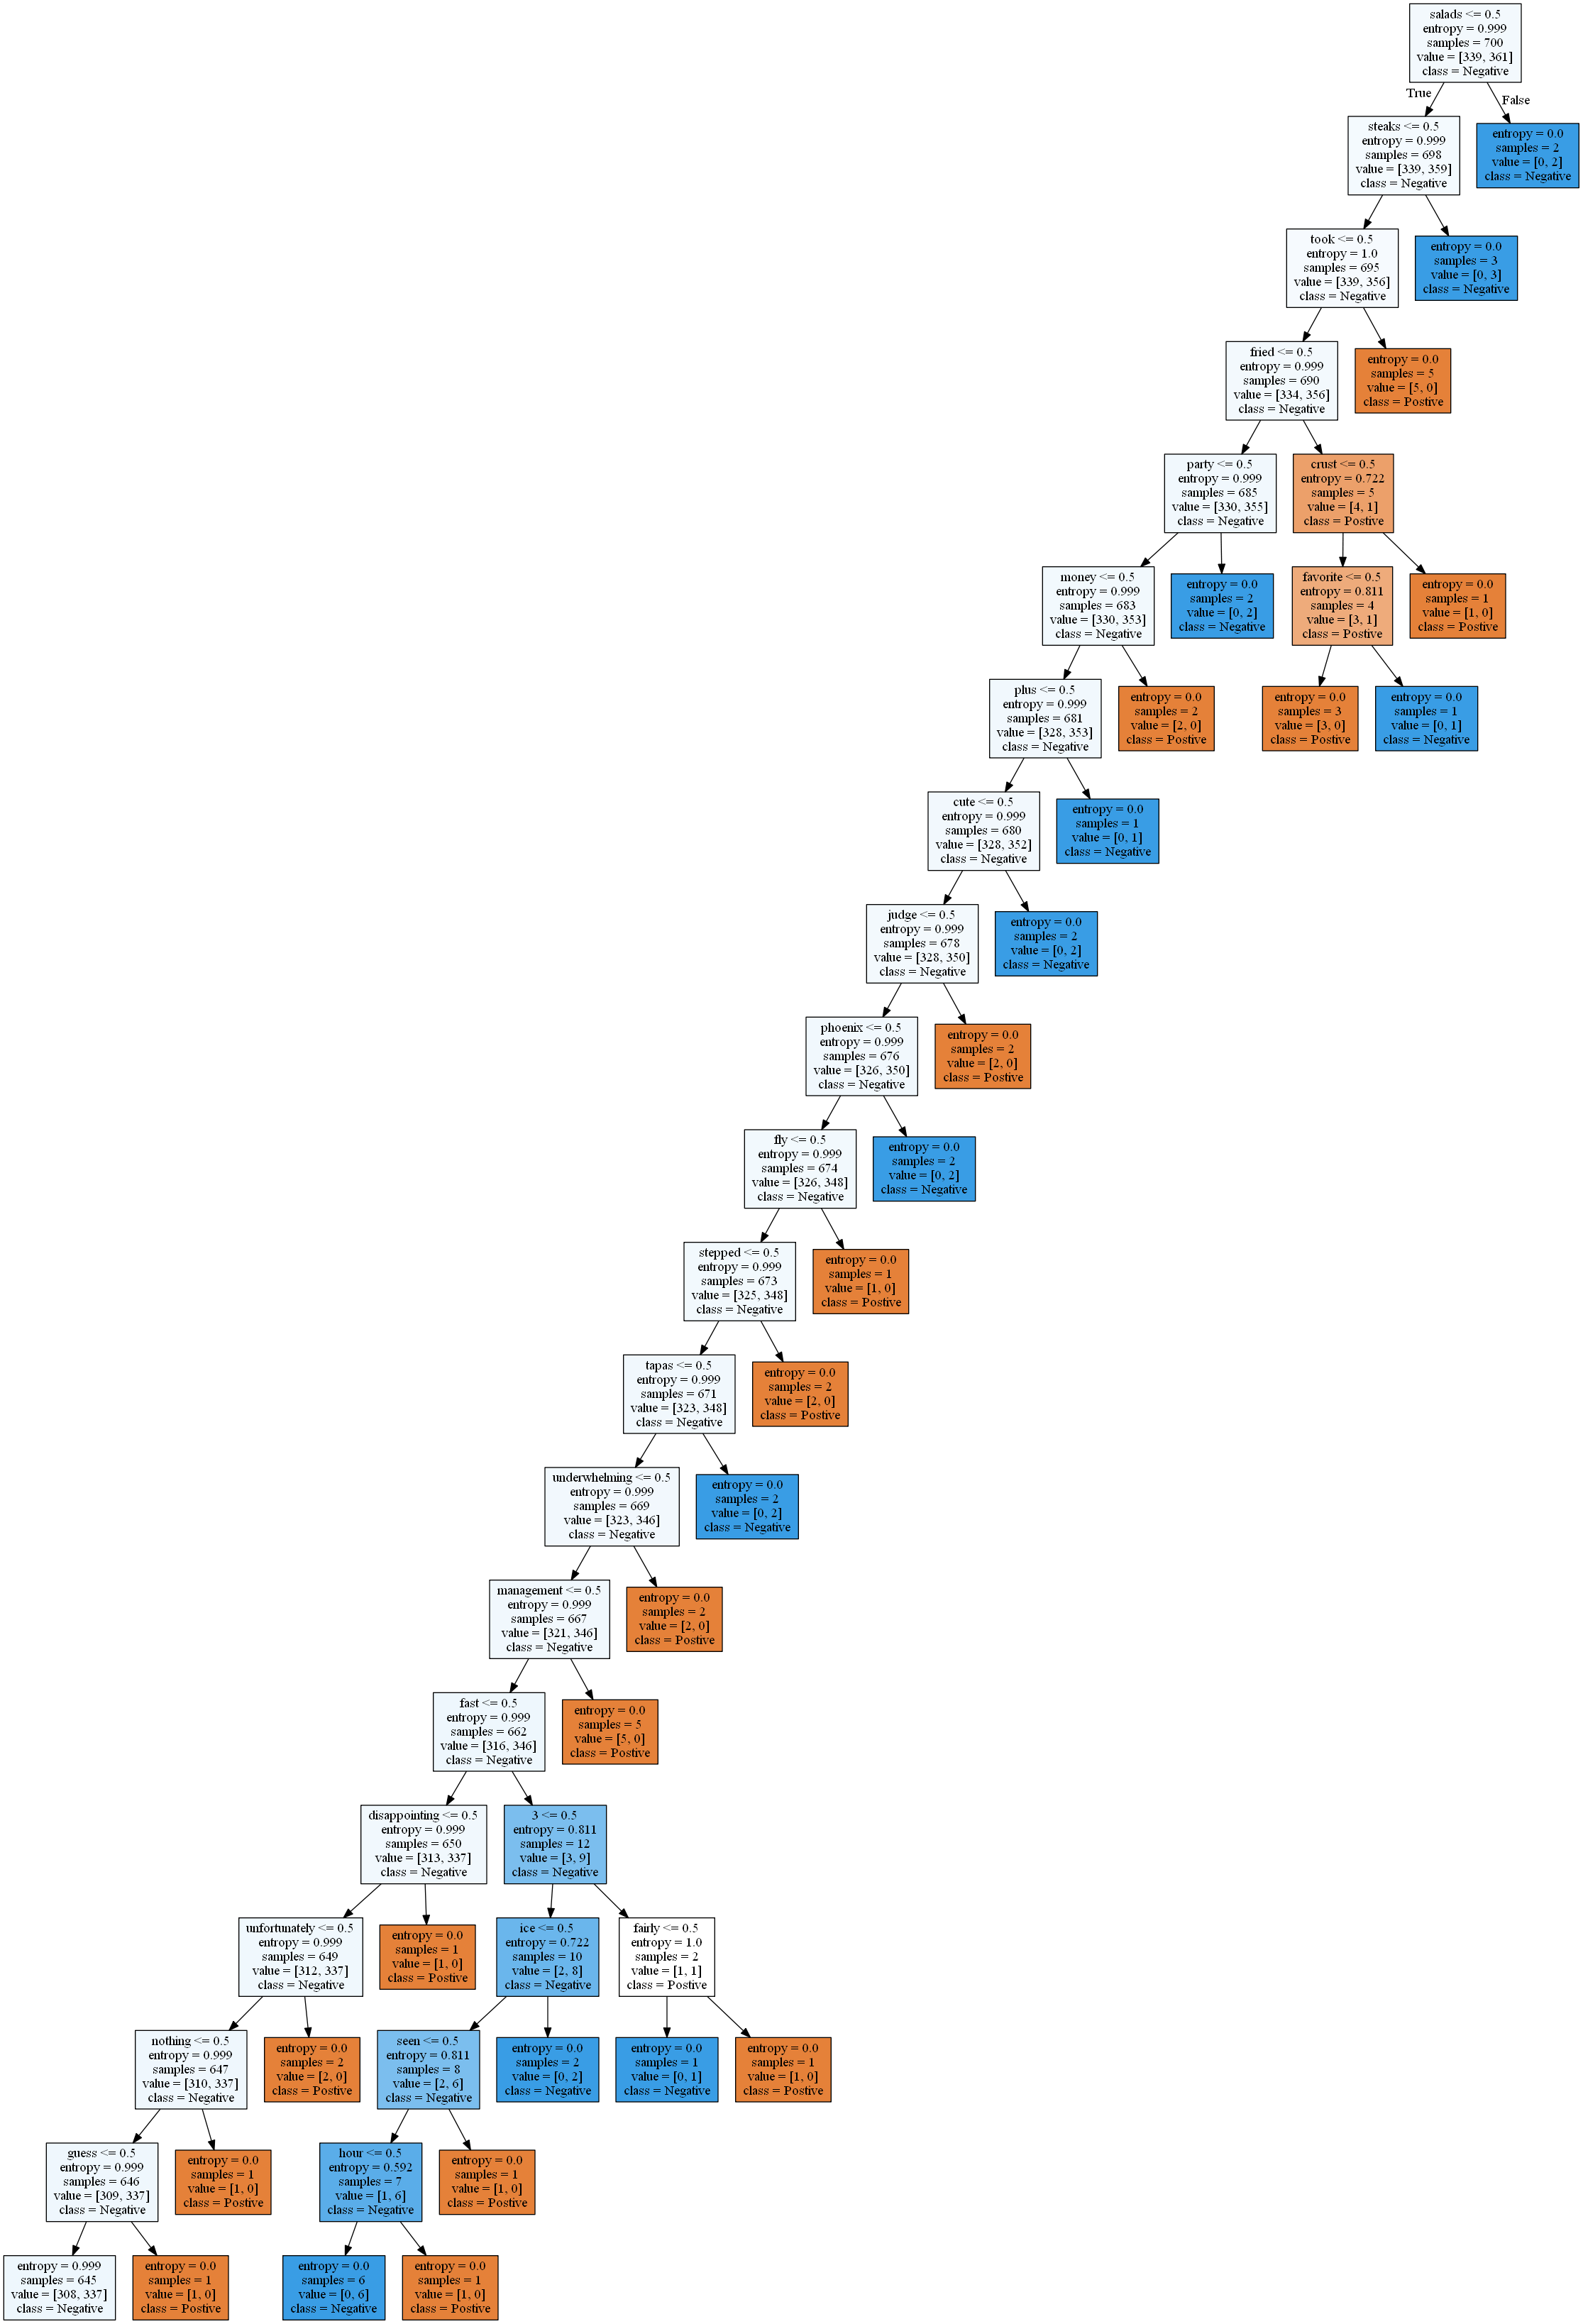

In [135]:
# Render our tree.
dot_data = tree.export_graphviz(
    clf, out_file=None,
    feature_names= X.columns,
    class_names=['Postive', 'Negative'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [152]:
import time
start_time = time.time()
# Initialize and train our tree.
clf = tree.DecisionTreeClassifier(
    criterion='entropy', splitter='best',
    max_features=1,
    max_depth=20,
    #random_state = 1337
)
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("--- %s seconds ---" % (time.time() - start_time))



Accuracy: 0.6
--- 0.032912254333496094 seconds ---


## Random Forest

In [45]:
#from sklearn import ensemble
from sklearn.model_selection import cross_val_score
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

In [153]:
# how few features can we use and stay above 90%?

rfc = RandomForestClassifier()
X = data_5
Y = target_5
#X = pd.get_dummies(X)
#X = X.dropna(axis=1)


print(cross_val_score(rfc, X, Y, cv=10))

import time
start_time = time.time()
cross_val_score(rfc, X, Y, cv=10)
print("--- %s seconds ---" % (time.time() - start_time))

[0.75 0.82 0.76 0.81 0.77 0.86 0.81 0.81 0.84 0.82]
--- 4.123128175735474 seconds ---


It's clear that the decision tree is faster but doesn't seem to perform as well as the random forest. When considering scale of the data, it will be wise to determine the best features, interested outcome, communication possibilities, and model parameters before predicting on either model. 